In [82]:
pwd

'/home/jovyan/Capstone/St Louis MR'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
post_treatment = pd.read_csv('data/St_Louis_MR_post.csv')
control_intersection = pd.read_csv('data/control.csv')
post_speeds = post_treatment['Avg Spot Speed (mph)']
control_speeds = control_intersection['Avg Spot Speed (mph)']
df = pd.DataFrame({'post_speeds': post_speeds, 
                   'control_intersection': control_speeds})
summary_table = df.describe()
print(summary_table)

       post_speeds  control_intersection
count  2298.000000           2302.000000
mean     14.679721             14.696785
std       2.040542              1.661534
min       9.000000              9.000000
25%      13.000000             14.000000
50%      15.000000             14.000000
75%      16.000000             16.000000
max      29.000000             25.000000


In [86]:
df = pd.DataFrame({'post_speeds': post_speeds, 
                   'control_intersection': control_speeds})

       post_speeds  control_speeds
count  1673.000000     1673.000000
mean     14.715481       14.723849
std       2.218421        1.756468
min       9.000000        9.000000
25%      13.000000       14.000000
50%      15.000000       15.000000
75%      16.000000       16.000000
max      29.000000       25.000000


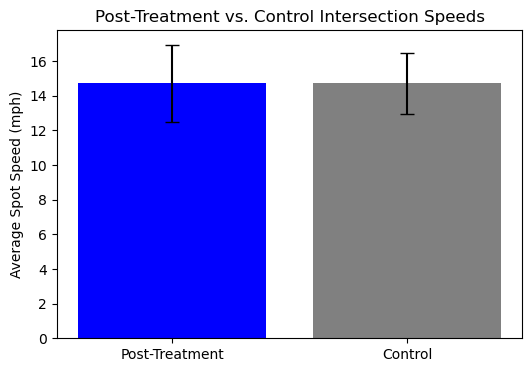

T-Statistic: -0.12075285937981989
P-Value: 0.9039


In [3]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

post_treatment = pd.read_csv('data/St_Louis_MR_post.csv')
control_intersection = pd.read_csv('data/control.csv')

filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')
post_treatment = post_treatment[~filters]

filters = (control_intersection['Day Type'] == '0: All Days (M-Su)') | (control_intersection['Day Part'] == '0: All Day (12am-12am)')
control_intersection = control_intersection[~filters]

post_speeds = post_treatment['Avg Spot Speed (mph)']
control_speeds = control_intersection['Avg Spot Speed (mph)']
valid_indices = post_speeds.notna() & control_speeds.notna()
post_speeds_clean = post_speeds[valid_indices]
control_speeds_clean = control_speeds[valid_indices]

t_stat, p_value = stats.ttest_rel(post_speeds_clean, control_speeds_clean)

df = pd.DataFrame({
    'post_speeds': post_speeds_clean,
    'control_speeds': control_speeds_clean
})
summary_table = df.describe()
print(summary_table)

bar_colors = ['blue', 'gray']
plt.figure(figsize=(6, 4))
plt.bar(['Post-Treatment', 'Control'], 
        [post_speeds_clean.mean(), control_speeds_clean.mean()], 
        yerr=[post_speeds_clean.std(), control_speeds_clean.std()], capsize=5, color=bar_colors)

plt.ylabel('Average Spot Speed (mph)')
plt.title('Post-Treatment vs. Control Intersection Speeds')
plt.show()

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value:.4f}")

